In [1]:
from scratch.linear_algebra import Vector, dot, distance, add, scalar_multiply, vector_mean
from typing import Callable, TypeVar, Iterator
from matplotlib import pyplot as plt
import random

def sum_of_squares(v:Vector) -> float:
    """
    Compute the sum of squared elements in v
    """
    return dot(v, v)

**Gradient** -> gives you the imput direction which the function (sum of squares ie) most quickly increases. 

Similarly, you can try to minimise a function by taking small steps in the opposite direction. 

**Note** -> if a function has a global minimum, this procedure is likely to find it. Otherwise it's possible it will be "stuck" in a local minimum and run forever...

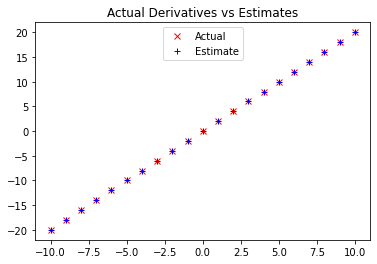

In [2]:
def difference_quotient(f: Callable[[float], float],
                        x: float,
                        h: float) -> float:
    return (f(x + h) - f(x)) / h

def square(x: float) -> float:
    return x * x

def derivative(x: float) -> float:
    return 2 * x

xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.0001)
             for x in xs]

plt.title('Actual Derivatives vs Estimates')
plt.plot(xs, actuals, 'rx', label='Actual')
plt.plot(xs, estimates, 'b+', label='Estimate')
plt.legend(loc=9);

# we can estimate gradientes by evaluating difference quotient
# for very small h
# results below

In [3]:
# when f is a function for several variables, it has multiple partial derivatives
# each indicating how f changes when we make small changes in just one of the input variables

def partial_difference_quotient(f: Callable[[Vector], float],
                       v: Vector,
                       i: int,
                       h: float) -> float:
    """
    Returns the i-th partial difference quotint of f at v
    """
    w = [v_j + (h if j == i else 0) # add h to just ith element of v
         for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h

def estimate_gradient(f: Callable[[Vector], float],
                      v: Vector,
                      h: float = 0.0001):
    return [partial_difference_quotient(f, v, i, h)
            for i in range(len(v))]

In [4]:
def gradient_step(v: Vector, gradient: Vector,
                  step_size:float) -> Vector:
    """
    Moves 'step_size' in the 'gradient' direction from v
    """
    assert len(v) == len(gradient)
    
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares_gradient(v: Vector)->Vector:
    return [2 * v_i for v_i in v]

# pick a random starting point
v = [random.uniform(-10, 10) for i in range(3)]

for epoch in range(1000):
    grad = sum_of_squares_gradient(v) # compute gradient at v
    v = gradient_step(v, grad, -0.01) # take a negative grad. step
    if epoch % 25 == 0:
        print(epoch)
        print(grad)
        print(v)
        
# v will ve very close to 0
assert distance(v, [0,0,0]) < 0.0001


0
[13.208012514257312, -11.742984257911413, 5.865762683672816]
[6.471926131986083, -5.754062286376592, 2.87422371499968]
25
[7.970569702832574, -7.086476821998351, 3.539780892849753]
[3.905579154387961, -3.4723736427791922, 1.7344926374963792]
50
[4.809957691903722, -4.276438820471651, 2.136132919980079]
[2.3568792690328237, -2.0954550220311092, 1.0467051307902389]
75
[2.9026398187926064, -2.58067999721191, 1.2890808753275844]
[1.4222935112083772, -1.2645331986338357, 0.6316496289105163]
100
[1.751640753893146, -1.5573493571632895, 0.7779148420927046]
[0.8583039694076415, -0.7631011850100119, 0.38117827262542525]
125
[1.0570534142178305, -0.939805408991883, 0.4694441699744672]
[0.5179561729667369, -0.4605046504060227, 0.23002764328748893]
150
[0.6378944529728233, -0.5671394171820322, 0.2832929991799204]
[0.3125682819566834, -0.27789831441919577, 0.138813569598161]
175
[0.38494680369070206, -0.3422486351367161, 0.17095733319836393]
[0.188623933808444, -0.1677018312169909, 0.083769093267

In [27]:
# example -50 to 40 xs, y is always 20 * x + 5
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

# we'll use the gradient descent to find the slope and intercept that minimizes the avergae squared err

def linear_gradient(x: float, y: float, theta:Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept # model predic.
    error = (predicted - y)
    squared_error = error ** 2 # we'll minimise sq. error
    grad = [2 * error * x, 2 * error] # using its gradient
    return grad

# Now this computation is for single data point
# for the whole data we'll look into th emean squared error
# the gradient of the mean sq err is just the mean of the individal gradients

# we will:
# 1 - start with random val for theta
# 2 - compute the mean of the gradients
# 3 - adjust the theta in that direction
# 4 - repeat

In [28]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
print(theta)
learning_rate = 0.001
for epoch in range(5_000):
    # Compute the mean of the gradients
    grad = vector_mean([linear_gradient(x, y, theta)
                        for x, y in inputs])
    theta = gradient_step(theta, grad, - learning_rate)
    if epoch % 1000 == 0:
        print(epoch)
        print(grad)
        print(theta)
        
slope, intercept = theta
assert 19.9 < slope < 20.1
assert 4.9 < intercept < 5.1

[0.986310602026621, -0.3771089646381105]
0
[-31690.443117456973, 8.259471468697223]
[32.67675371948359, -0.3853684361068077]
1000
[-0.0008744960356102638, -1.4560364257889171]
[19.99956349513274, 4.2732191338496675]
2000
[-0.00011818449325403436, -0.1967772501871452]
[19.99994100818774, 4.901778597158228]
3000
[-1.5972139063791246e-05, -0.02659362465481296]
[19.99999202750261, 4.986725787062468]
4000
[-2.1585679269264803e-06, -0.003594017456885883]
[19.99999892255023, 4.998206045484863]


**Minibatch and Stochastic Gradient descent**

A drawback of preceding approach is we have to evaluate the gradient in all points of x, for larger datasets this will be computationally expensive.

An alternative is the `minibatch gradient descent`, where we compute the gradient and take a gradient step based on a minibatch sampled from a large dataset.

Another variation is the `stochastic gradient descent`, in which you take the gradient steps based on **one** training example 


In [29]:
T = TypeVar('T')

def minibatches(dataset: list[T],
                batch_size: int,
                shuffle: bool = True)-> Iterator[list[T]]:
    """
    Generates 'batch_size' -seized inibatches from the dataset
    """
    batch_starts = [start 
                    for start in range(0, len(dataset), batch_size)]
    
    if shuffle: random.shuffle(batch_starts) # shuffle batches
    
    for start in batch_starts:
        end = start + batch_size
        yield dataset[start : end]

                    

# solve same problem again using minibatches
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size=5):
    
        grad = vector_mean([linear_gradient(x, y, theta)
                           for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    if epoch % 200 == 0:
        print(epoch)
        print(batch)
        print(grad)
        print(theta)
        
slope, intercept = theta
assert 19.9 < slope < 20.1
assert 4.9 < intercept < 5.1

0
[(45, 905), (46, 925), (47, 945), (48, 965), (49, 985)]
[2227.6327828835033, 47.37986201482486]
[17.967184263800252, 19.486149951261044]
200
[(10, 205), (11, 225), (12, 245), (13, 265), (14, 285)]
[0.14209704250652067, 0.011681801381769219]
[20.000336759438817, 5.000082941113647]
400
[(-10, -195), (-9, -175), (-8, -155), (-7, -135), (-6, -115)]
[-7.538410000051954e-06, 9.360331887364737e-07]
[19.99999999500229, 5.0000003667916015]
600
[(-10, -195), (-9, -175), (-8, -155), (-7, -135), (-6, -115)]
[5.655317636410473e-09, -7.091273346304661e-10]
[19.99999999998992, 4.999999999610754]
800
[(-50, -995), (-49, -975), (-48, -955), (-47, -935), (-46, -915)]
[0.0, 0.0]
[20.0, 4.999999999999991]


In [30]:
# stochastic gradient descent

theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
print(theta)

for epoch in range(100):
    for x, y in inputs:
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, -learning_rate)
    if epoch % 10 == 0:
        print(epoch)
        print(grad)
        print(theta)

slope, intercept = theta
assert 19.9 < slope < 20.1
assert 4.9 < intercept < 5.1

[-0.4823362510054805, -0.9672518471963591]
0
[2.4373700930193536, 0.04974224679631334]
[20.12252912749519, -1.098537000670952]
10
[1.5726647351777956, 0.03209519867709787]
[20.079030172191892, 1.0664764947134666]
20
[1.0143605222274346, 0.020701235147498664]
[20.05097403514134, 2.4628985288237164]
30
[0.6542473906565647, 0.013351987564419687]
[20.03287798573138, 3.3635832188149406]
40
[0.42199870573358567, 0.008612218484358891]
[20.021206113647334, 3.94451999172344]
50
[0.27216895482365544, 0.0055544684657888865]
[20.01367784327181, 4.319221080659415]
60
[0.1755576547104738, 0.0035828092798055877]
[20.008822127159807, 4.560901265919266]
70
[0.11324670474891718, 0.00231115723977382]
[20.005690214257267, 4.716783680323819]
80
[0.07304775000579866, 0.0014907704082816053]
[20.003670154171967, 4.8173270002570305]
90
[0.047101823824277744, 0.0009612617106995458]
[20.0023672404416, 4.882176898587888]
